# 🎇DATA VIZ

**EKANE Emile**


# First Part

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

 ## Data Loading

In [3]:
file_path = "./uber-raw-data-apr14.csv"

In [4]:
df = pd.read_csv(file_path)
df.head(10)

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
5,4/1/2014 0:33:00,40.7383,-74.0403,B02512
6,4/1/2014 0:39:00,40.7223,-73.9887,B02512
7,4/1/2014 0:45:00,40.7620,-73.9790,B02512
8,4/1/2014 0:55:00,40.7524,-73.9960,B02512
9,4/1/2014 1:01:00,40.7575,-73.9846,B02512


## Data Transformation

In [5]:
df.dtypes

Date/Time     object
Lat          float64
Lon          float64
Base          object
dtype: object

#### Transform column date/time datas to datetime

In [6]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])

In [7]:
#To check if the column has been transformed to datetime
df.dtypes

Date/Time    datetime64[ns]
Lat                 float64
Lon                 float64
Base                 object
dtype: object

#### Creating functions

In [8]:
#Get day of month 
def get_dom(dt):
    return dt.day
df['dom'] = df['Date/Time'].map(get_dom)

In [9]:
#Get weekday and hours
def get_weekday(dt):
    return dt.weekday()
df['weekday'] = df['Date/Time'].map(get_weekday)
def get_hour(dt):
    return dt.hour
df['hour'] = df['Date/Time'].map(get_hour)
#df.tail(30)

In [10]:
#Analyse the day of month
df['day'] = df['Date/Time'].map(get_dom)
df.head()

,Date/Time,Lat,Lon,Base,dom,weekday,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,1
1,2014-04-01 00:17:00,40.7267,-74.0345,B02512,1,1,0,1
2,2014-04-01 00:21:00,40.7316,-73.9873,B02512,1,1,0,1
3,2014-04-01 00:28:00,40.7588,-73.9776,B02512,1,1,0,1
4,2014-04-01 00:33:00,40.7594,-73.9722,B02512,1,1,0,1


## Visual representation

Text(0, 0.5, 'Frequency')

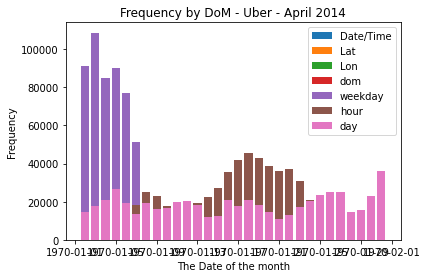

In [11]:
#Creating histogram , adding title, x and y labels
df.plot(kind='hist',bins = 30, rwidth=0.8, range=(0.5,30.5), title='Frequency by DoM - Uber - April 2014')
plt.xlabel('The Date of the month')
plt.ylabel('Frequency')

<AxesSubplot:title={'center':'Frequency by DoM - Uber - April 2014'}, ylabel='Frequency'>

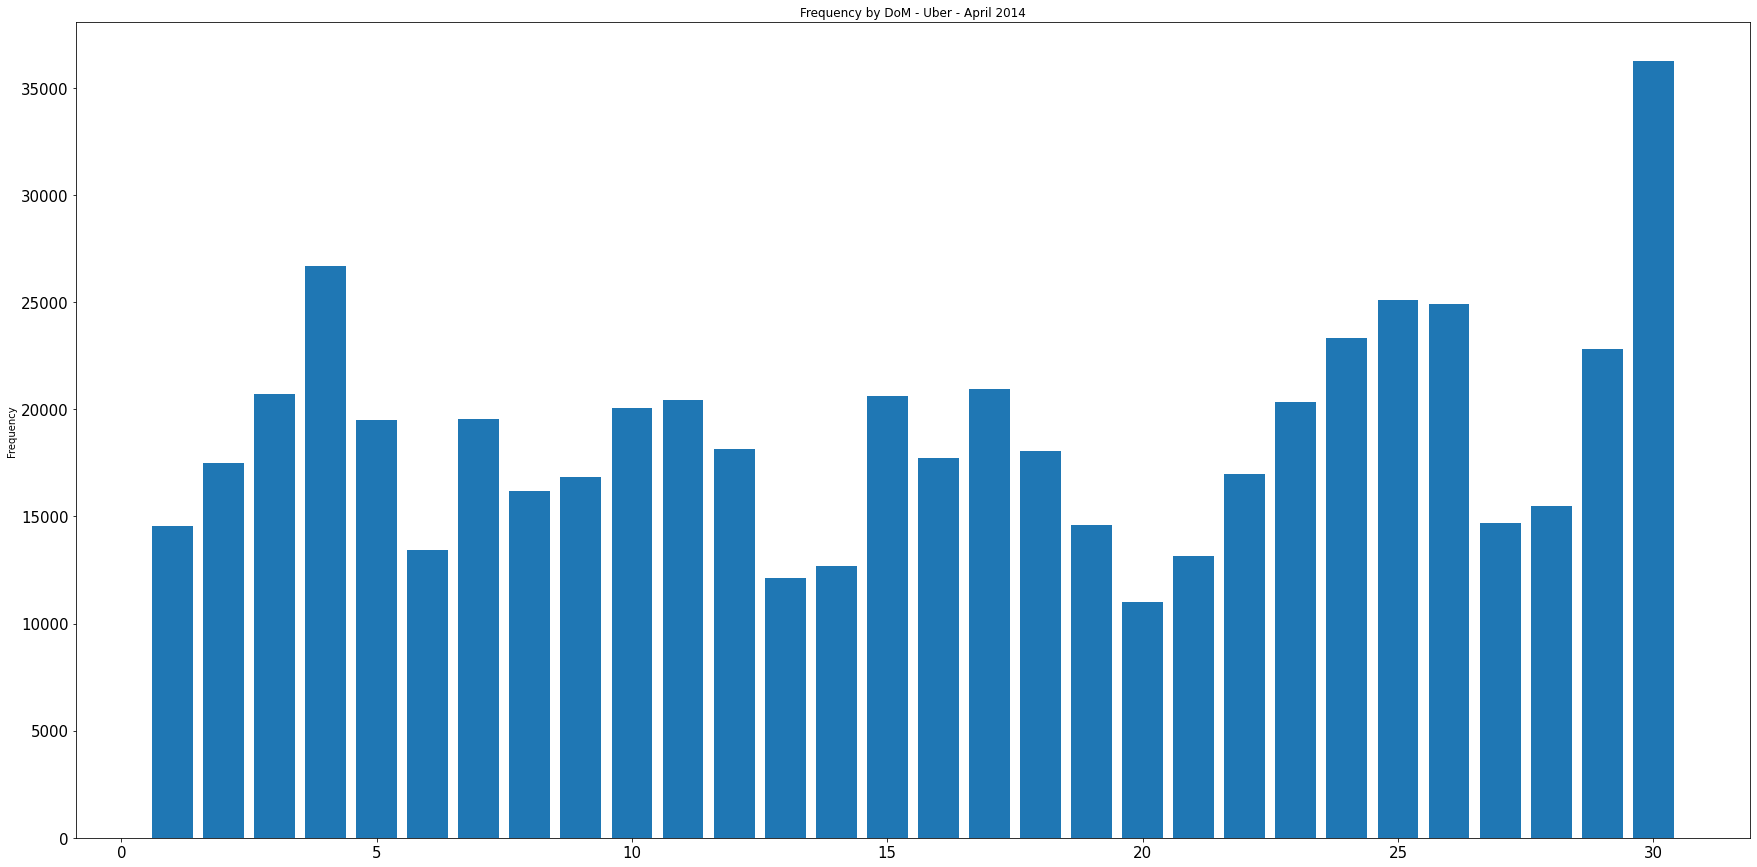

In [12]:
df['dom'].plot.hist(bins = 30, rwidth=0.8, range=(0.5,30.5), figsize = (30,15) ,fontsize=15, title = "Frequency by DoM - Uber - April 2014")

In [13]:
#Create function for grouping data by date of month
def count_rows(rows):
    return len(rows)
day_by_date = df.groupby('day').apply(count_rows)
day_by_date


day
1     14546
2     17474
3     20701
4     26714
5     19521
6     13445
7     19550
8     16188
9     16843
10    20041
11    20420
12    18170
13    12112
14    12674
15    20641
16    17717
17    20973
18    18074
19    14602
20    11017
21    13162
22    16975
23    20346
24    23352
25    25095
26    24925
27    14677
28    15475
29    22835
30    36251
dtype: int64

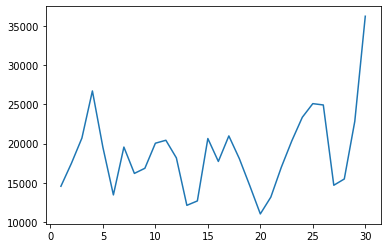

In [14]:
#ploting the data day_by_date using plot and bar function
plt.plot(day_by_date)

In [15]:
#Sort data by date 
df_sorted = df.sort_values(by=['day'])
df_sorted

,Date/Time,Lat,Lon,Base,dom,weekday,hour,day
0,2014-04-01 00:11:00,40.7690,-73.9549,B02512,1,1,0,1
219255,2014-04-01 07:24:00,40.7410,-73.9977,B02617,1,1,7,1
219254,2014-04-01 07:24:00,40.6883,-73.9595,B02617,1,1,7,1
219253,2014-04-01 07:22:00,40.7127,-73.9659,B02617,1,1,7,1
219252,2014-04-01 07:22:00,40.7350,-74.0026,B02617,1,1,7,1
...,...,...,...,...,...,...,...,...
324305,2014-04-30 17:58:00,40.6853,-73.9591,B02617,30,2,17,30
324304,2014-04-30 17:58:00,40.7542,-73.9671,B02617,30,2,17,30
324303,2014-04-30 17:58:00,40.7504,-73.9844,B02617,30,2,17,30
324310,2014-04-30 17:58:00,40.7398,-73.9909,B02617,30,2,17,30


<BarContainer object of 30 artists>

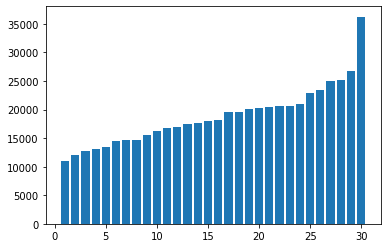

In [16]:
#plot the sorted data by date using bar function
plt.bar(range(1, 31),day_by_date.sort_values())

(array([ 7769.,  4935.,  5040.,  6095.,  9476., 18498., 24924., 22843.,
        17939., 17865., 18774., 19425., 22603., 27190., 35324., 42003.,
        45475., 43003., 38923., 36244., 36964., 30645., 20649.,     0.]),
 array([ 0.5       ,  1.47916667,  2.45833333,  3.4375    ,  4.41666667,
         5.39583333,  6.375     ,  7.35416667,  8.33333333,  9.3125    ,
        10.29166667, 11.27083333, 12.25      , 13.22916667, 14.20833333,
        15.1875    , 16.16666667, 17.14583333, 18.125     , 19.10416667,
        20.08333333, 21.0625    , 22.04166667, 23.02083333, 24.        ]),
 <BarContainer object of 24 artists>)

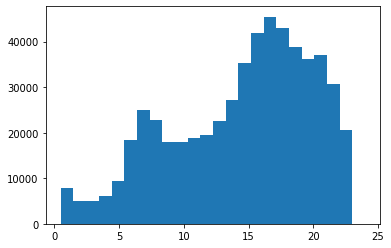

In [17]:
#Visualise the data by hours using histogram
plt.hist(df.hour, bins=24 , range=(0.5,24) )

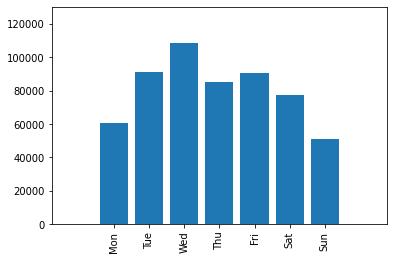

In [18]:
#Visualize the data by weekday using histogram
plt.hist(df.weekday, bins=7,range = (-.5,6.5), rwidth=0.8 )
plt.xticks(np.arange(7), 'Mon Tue Wed Thu Fri Sat Sun'.split(),rotation='vertical')
# Pad margins so that markers don't get clipped by the axes
plt.margins(0.2) 

## Cross Analysis

In [19]:
#Group data by weekday an hour using .apply(count_rows).unstack()
data_by_weekday = df.groupby(['weekday','hour']).apply(count_rows).unstack()
data_by_weekday.head(30)

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,518,261,238,571,1021,1619,2974,3888,3138,2211,...,3117,3818,4962,5574,4725,4386,3573,3079,1976,1091
1,765,367,304,516,887,1734,3766,5304,4594,2962,...,4489,6042,7521,8297,7089,6459,6310,5993,3614,1948
2,899,507,371,585,1003,1990,4230,5647,5242,3846,...,5438,7071,8213,9151,8334,7794,7783,6921,4845,2571
3,792,459,342,567,861,1454,3179,4159,3616,2654,...,4083,5182,6149,6951,6637,5929,6345,6585,5370,2909
4,1367,760,513,736,932,1382,2836,3943,3648,2732,...,4087,5354,6259,6790,7258,6247,5165,6265,6708,5393
5,3027,2479,1577,1013,706,704,844,1110,1372,1764,...,3042,4457,5410,5558,6165,5529,4792,5811,6493,5719
6,4542,2936,1590,1052,685,593,669,873,1233,1770,...,2934,3400,3489,3154,2795,2579,2276,2310,1639,1018


<AxesSubplot:xlabel='hour', ylabel='weekday'>

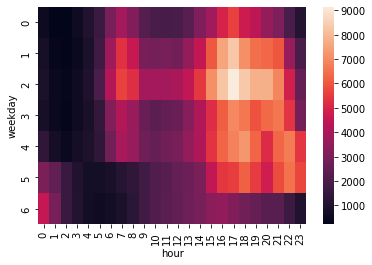

In [20]:
#Create Heatmap using seaborn for the grouped data
sns.heatmap(data_by_weekday)

<AxesSubplot:ylabel='Frequency'>

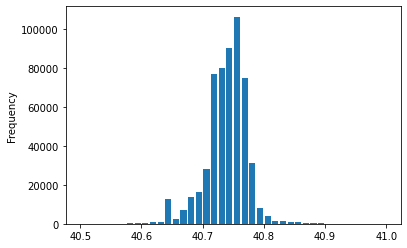

In [21]:
#analyse lat and long data
df['Lat'].plot(kind='hist', bins = 40, rwidth=0.8,range =(40.5,41) )

<AxesSubplot:ylabel='Frequency'>

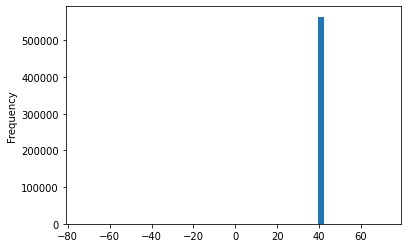

In [22]:
df['Lat'].plot(kind='hist', bins = 40, rwidth=0.8,range =(-74.05,72.1) )

In [23]:
#Merge the 2 histograms lat and long using twiny()


In [24]:
#Plt the dots for lat and long ,figsize(20,20)

In [25]:
file_path = "./ny-trips-data.csv"
df = pd.read_csv(file_path)
df.dtypes QeP45czVmu

VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
dropoff_longitude        float64
dropoff_latitude         float64
fare_amount              float64
tip_amount               float64
total_amount             float64
dtype: object